In [1]:
import glob
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

In [2]:
def draw_it(strokes):
    image = Image.new("P", (256,256), color=255)
    image_draw = ImageDraw.Draw(image)

    for stroke in strokes:
        for i in range(len(stroke[0])-1):
            image_draw.line([stroke[0][i], 
                             stroke[1][i],
                             stroke[0][i+1], 
                             stroke[1][i+1]],
                            fill=0, width=6)

    return np.array(image)

def file_len(fname):
    with open(fname) as f:
        for _ in enumerate(f):
            pass
    return i + 1

In [3]:
data_files_csv = glob.glob("../../quickdraw/train_simplified/*.csv")

shard_count = 10
for data_file_csv in data_files_csv:
    df = pd.read_csv(data_file_csv, index_col="key_id")
    shard_size = math.ceil(len(df) / float(shard_count))
    shuffeled_indexes = df.index.values
    np.random.shuffle(shuffeled_indexes)
    for shard_index in range(shard_count):
        start_index = shard_index * shard_size
        end_index = min(start_index + shard_size, len(shuffeled_indexes))
        shard_df = df[df.index.isin(shuffeled_indexes[start_index:end_index])]
        shard_df.to_csv("../../quickdraw/train_simplified_shards/{}-{}.csv".format(os.path.basename(data_file_csv)[:-4], shard_index))

In [4]:
data_files_csv = glob.glob("../../quickdraw/train_simplified_shards/*-0.csv")

sample_count = 0
for data_file_csv in data_files_csv:
    sample_count += len(pd.read_csv(data_file_csv, index_col="key_id"))

print(sample_count)

4970912


In [13]:
df = pd.read_csv(
    "../../quickdraw/train_simplified_shards/owl-0.csv",
    index_col="key_id",
    converters={"drawing": lambda d: np.asarray(eval(d))})

In [14]:
np.asarray(df.drawing.values[0]).shape

(9, 2)

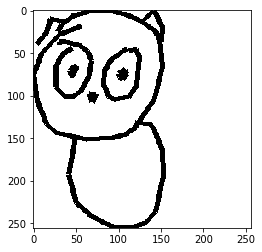

In [16]:
plt.imshow(draw_it(df.drawing.values[0]), cmap="gray")

In [ ]:
n = 10
fig, axs = plt.subplots(nrows=n, ncols=n, sharex=True, sharey=True, figsize=(16, 10))
for i, drawing in enumerate(df.drawing[:n * n]):
    ax = axs[i // n, i % n]
    i = draw_it(drawing)
    ax.imshow(i, cmap="gray")
    ax.axis('off')
plt.show();

In [ ]:
n = 10
fig, axs = plt.subplots(nrows=n, ncols=n, sharex=True, sharey=True, figsize=(16, 10))
for i, drawing in enumerate(df.drawing[:n * n]):
    ax = axs[i // n, i % n]
    for x, y in drawing:
        ax.plot(x, -np.array(y), lw=3)
    ax.axis('off')
plt.show();